## 3.4.1 야후 파이낸스로 주식 시세 구하기

In [2]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
sec.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-04,53000.0,53900.0,51800.0,51900.0,46620.242188,39565391
2018-05-08,52600.0,53200.0,51900.0,52600.0,47249.031250,23104720
2018-05-09,52600.0,52800.0,50900.0,50900.0,45721.964844,16128305
2018-05-10,51700.0,51700.0,50600.0,51600.0,46350.757812,13905263
2018-05-11,52000.0,52200.0,51200.0,51300.0,46081.277344,10314997
2018-05-14,51000.0,51100.0,49900.0,50100.0,45003.355469,14909272
2018-05-15,50200.0,50400.0,49100.0,49200.0,44194.910156,18709146
2018-05-16,49200.0,50200.0,49150.0,49850.0,44778.789062,15918683
2018-05-17,50300.0,50500.0,49400.0,49400.0,44374.570312,10365440


In [4]:
tmp_msft = msft.drop(columns='Volume')
tmp_msft.tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2021-08-18,292.040009,294.820007,290.269989,290.730011,290.730011
2021-08-19,288.690002,297.470001,288.640015,296.769989,296.769989
2021-08-20,299.720001,305.839996,298.059998,304.359985,304.359985
2021-08-23,303.250000,305.399994,301.850006,304.649994,304.649994
2021-08-24,305.019989,305.640015,302.010010,302.619995,302.619995


In [5]:
sec.index

DatetimeIndex(['2018-05-04', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18',
               ...
               '2021-08-11', '2021-08-12', '2021-08-13', '2021-08-17',
               '2021-08-18', '2021-08-19', '2021-08-20', '2021-08-23',
               '2021-08-24', '2021-08-25'],
              dtype='datetime64[ns]', name='Date', length=814, freq=None)

In [6]:
sec.tail

<bound method NDFrame.tail of                Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2018-05-04  53000.0  53900.0  51800.0  51900.0  46620.242188  39565391
2018-05-08  52600.0  53200.0  51900.0  52600.0  47249.031250  23104720
2018-05-09  52600.0  52800.0  50900.0  50900.0  45721.964844  16128305
2018-05-10  51700.0  51700.0  50600.0  51600.0  46350.757812  13905263
2018-05-11  52000.0  52200.0  51200.0  51300.0  46081.277344  10314997
...             ...      ...      ...      ...           ...       ...
2021-08-19  73500.0  74400.0  73100.0  73100.0  73100.000000  22166298
2021-08-20  73500.0  73900.0  72500.0  72700.0  72700.000000  22364803
2021-08-23  73300.0  74000.0  73000.0  73300.0  73300.000000  19384648
2021-08-24  73900.0  75700.0  73900.0  75600.0  75600.000000  21016913
2021-08-25  76200.0  76600.0  75500.0  75900.0  75900.000000   7848302

[814 rows x 6 columns]>

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


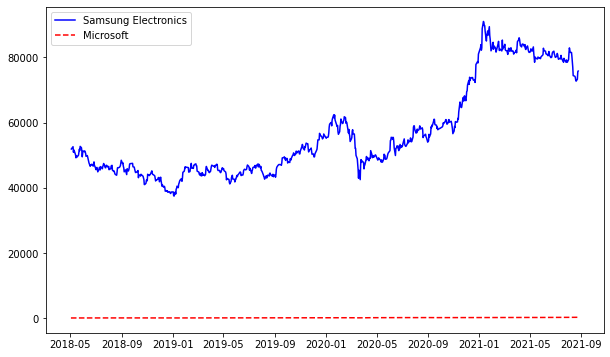

In [7]:
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')

plt.figure(figsize=(10,6))
plt.plot(sec.index, sec.Close, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft.Close, 'r--', label='Microsoft')
plt.legend(loc='best')
plt.show()

## 3.4.2 일간 변동률로 주가 비교하기

In [8]:
sec['Close']

Date
2018-05-04    51900.0
2018-05-08    52600.0
2018-05-09    50900.0
2018-05-10    51600.0
2018-05-11    51300.0
               ...   
2021-08-19    73100.0
2021-08-20    72700.0
2021-08-23    73300.0
2021-08-24    75600.0
2021-08-25    75800.0
Name: Close, Length: 814, dtype: float64

In [9]:
sec['Close'].shift(1)

Date
2018-05-04        NaN
2018-05-08    51900.0
2018-05-09    52600.0
2018-05-10    50900.0
2018-05-11    51600.0
               ...   
2021-08-19    73900.0
2021-08-20    73100.0
2021-08-23    72700.0
2021-08-24    73300.0
2021-08-25    75600.0
Name: Close, Length: 814, dtype: float64

In [10]:
sec_dpc = (sec['Close'] / sec['Close'].shift(1) -1) * 100
sec_dpc.head()

Date
2018-05-04         NaN
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

In [11]:
sec_dpc.iloc[0] = 0

In [12]:
sec_dpc.head()

Date
2018-05-04    0.000000
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

## 3.4.3 주가 일간 변동률 히스토그램

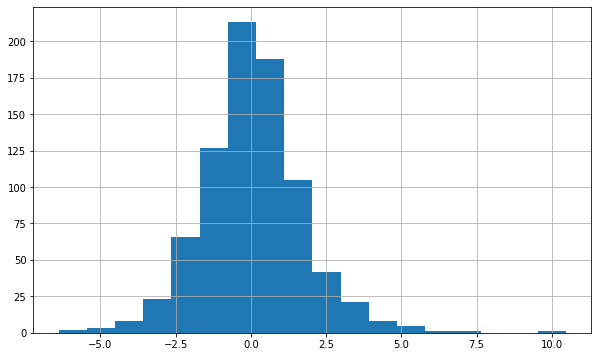

In [13]:
import matplotlib.pyplot as plt
sec_dpc = (sec['Close']-sec['Close'].shift(1)) / sec['Close'].shift(1) * 100
sec_dpc.iloc[0] = 0

plt.figure(figsize=(10,6))
plt.hist(sec_dpc, bins=18)
plt.grid(True)
plt.show()

In [14]:
sec_dpc.describe()

count    814.000000
mean       0.060789
std        1.692902
min       -6.387665
25%       -0.965018
50%        0.000000
75%        1.000975
max       10.470588
Name: Close, dtype: float64

In [15]:
sec_dpc_cs = sec_dpc.cumsum()

In [16]:
sec_dpc_cs

Date
2018-05-04     0.000000
2018-05-08     1.348748
2018-05-09    -1.883192
2018-05-10    -0.507946
2018-05-11    -1.089341
                ...    
2021-08-19    45.801697
2021-08-20    45.254501
2021-08-23    46.079811
2021-08-24    49.217601
2021-08-25    49.482151
Name: Close, Length: 814, dtype: float64

최종 변동률 가격

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


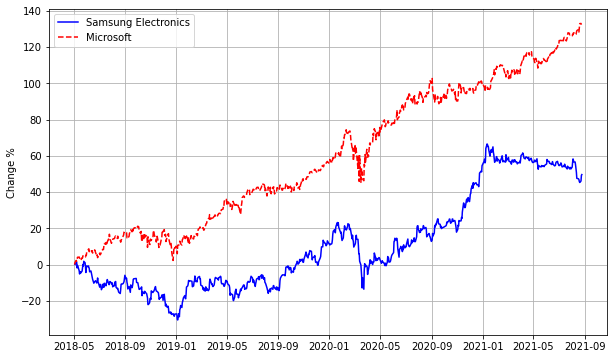

In [17]:
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
sec_dpc = (sec['Close']-sec['Close'].shift(1)) / sec['Close'].shift(1) * 100
sec_dpc.iloc[0] = 0
sec_dpc_cs = sec_dpc.cumsum()

msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')
msft_dpc = (msft['Close']-msft['Close'].shift(1)) / msft['Close'].shift(1) * 100
msft_dpc.iloc[0] = 0
msft_dpc_cs = msft_dpc.cumsum()

plt.figure(figsize=(10,6))
plt.plot(sec.index, sec_dpc_cs, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft_dpc_cs, 'r--', label='Microsoft')
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc='best')
plt.show()

## 3.5 최대 손실 낙폭 (MMD)
특정 기간에 발생한 최고점에서 최저점까지의 가장 큰 손실을 의미

-> 퀀트 투자에서는 수익률을 높이는 것보다 MMD를 낮추는 것이 더 낫다고도 말함

[*********************100%***********************]  1 of 1 completed


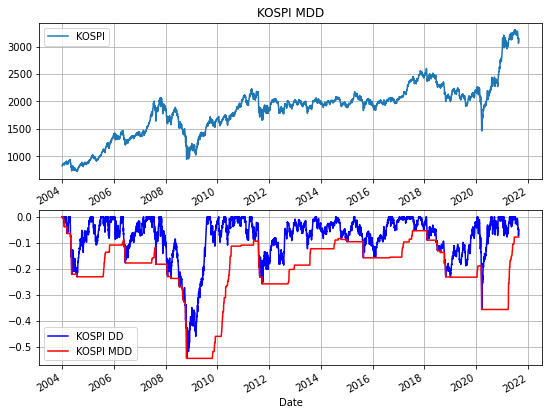

In [18]:
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt

yf.pdr_override()

kospi = pdr.get_data_yahoo('^KS11', '2004-01-04')

window = 252
peak = kospi['Adj Close'].rolling(window, min_periods=1).max()
drawdown = kospi['Adj Close']/peak - 1.0
max_dd = drawdown.rolling(window, min_periods=1).min()

plt.figure(figsize=(9,7))
plt.subplot(211)
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True)
plt.subplot(212)
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)
plt.show()

## 3.6.1 Kospi 다우존스 상관관계 비교

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


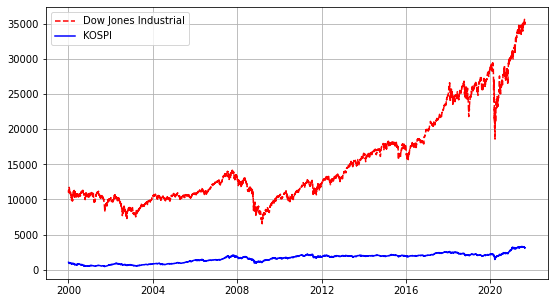

In [19]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

import matplotlib.pyplot as plt
plt.figure(figsize=(9,5))
plt.plot(dow.index, dow['Close'], 'r--', label='Dow Jones Industrial')
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

## 3.6.2 지수화 비교

현재 종가를 특정 시점의 종가로 나누어 변동률을 구함 (2000년 1월 4일 기준)

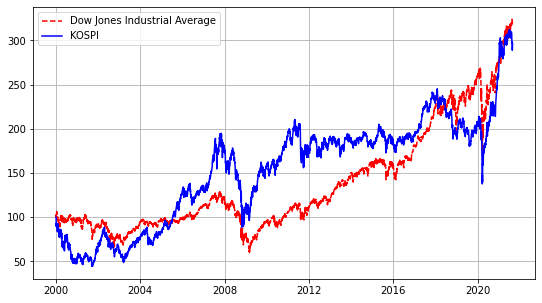

In [20]:
d = (dow.Close / dow.Close.loc['2000-01-04']) * 100
k = (kospi.Close / kospi.Close.loc['2000-01-04']) * 100

import matplotlib.pyplot as plt
plt.figure(figsize=(9, 5))
plt.plot(d.index, d, 'r--', label='Dow Jones Industrial Average')
plt.plot(k.index, k, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

## 3.6.3 산점도 분석

산점도 : 독립변수와 종속변수의 상관관계를 확인할 때 쓰는 그래프

-> 산점도를 그리기 위해서는 x와 y의 사이즈(데이터 개수)가 동일해야함

In [21]:
print(len(dow)) # 5445
print(len(kospi)) # 8338

5446
5338


ValueError: x and y must be the same size

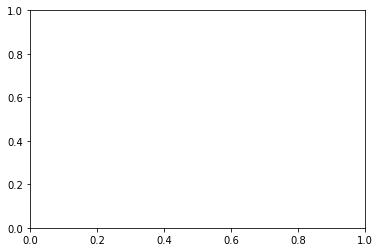

In [22]:
plt.scatter(dow, kospi, marker='.')

In [23]:
import pandas as pd
df = pd.DataFrame({'DOW':dow.Close, 'KOSPI':kospi.Close})

In [24]:
df

,DOW,KOSPI
Date,,
2000-01-03,11357.509766,NaN
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
...,...,...
2021-08-19,34894.121094,3097.830078
2021-08-20,35120.078125,3060.510010
2021-08-23,35335.710938,3090.209961


In [25]:
df = df.fillna(method='bfill')

In [26]:
df

,DOW,KOSPI
Date,,
2000-01-03,11357.509766,1059.040039
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
...,...,...
2021-08-19,34894.121094,3097.830078
2021-08-20,35120.078125,3060.510010
2021-08-23,35335.710938,3090.209961


In [27]:
df = df.fillna(method='ffill')


In [28]:
df

,DOW,KOSPI
Date,,
2000-01-03,11357.509766,1059.040039
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
...,...,...
2021-08-19,34894.121094,3097.830078
2021-08-20,35120.078125,3060.510010
2021-08-23,35335.710938,3090.209961


# 결과물

선형에 가까울수록 직접적인 관계에 있다.

-> 도출된 결과물을 통해서 kospi와 dow는 어느정도 영향은 있으나 강하지는 않음

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


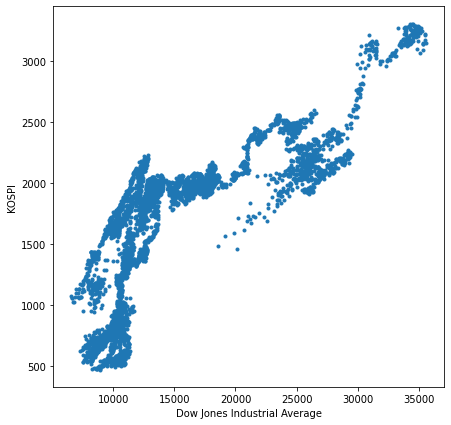

In [29]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
yf.pdr_override()

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'DOW':dow.Close, 'KOSPI':kospi.Close})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

plt.figure(figsize=(7, 7))
plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

## 3.6.4 사이파이 선형 회귀 분석

In [31]:
from scipy import stats
regr = stats.linregress(df['DOW'], df['KOSPI'])
regr

LinregressResult(slope=0.07862335941784519, intercept=435.2205535456512, rvalue=0.8043194105916939, pvalue=0.0, stderr=0.00077555198063134, intercept_stderr=12.838560996968146)

## 3.7 상관계수

독립변수와 종속변수 사이의 상관관계 정도를 나타내는 수치

In [34]:
df.corr()

,DOW,KOSPI
DOW,1.000000,0.804319
KOSPI,0.804319,1.000000


In [35]:
df.DOW.corr(df.KOSPI)

0.804319410591694

## 3.7.3 결정계수

관측한 데이터에서 추정한 회귀선이 실제로 데이터를 어느 정도 설명하는지 나타내는 계수

상관계수를 제곱한 값

1이면 모든 표본 관측치가 추정된 회귀선상에만 있음, 0이면 추정된 회귀선이 변수 사이의 관계를 설명하지 못함

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\Shin\AppData\Local\Temp/ipykernel_4488/2061577351.py:21: UserWarning: Legend does not support 'DOW x KOSPI' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(['DOW x KOSPI'], regr_line)


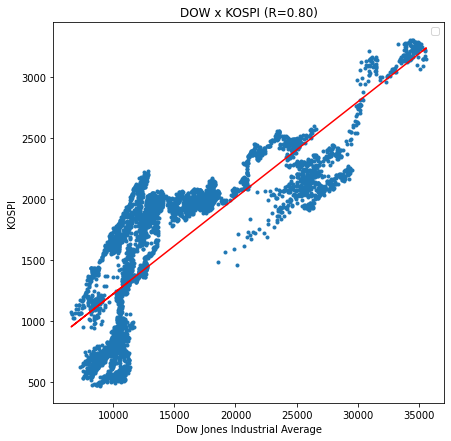

In [38]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
from scipy import stats
yf.pdr_override()

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'X':dow.Close, 'Y':kospi.Close})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'

plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, '.')
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW x KOSPI'], regr_line)
plt.title(f'DOW x KOSPI (R={regr.rvalue:.2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

